In [1]:
def train_test_split(X, Y, N_train):
    d, N = X.shape
    
    # Define the array of indices
    idx = np.arange(0, N)
    
    # Shuffle the indices
    np.random.shuffle(idx)
    
    # Extract train and test indices
    train_idx = idx[:N_train]
    test_idx = idx[N_train:]
    
    # Extract data
    X_train = X[:, train_idx]
    Y_train = Y[:, train_idx] #its important to not to loose the information of X and Y!! (Y contains the labels of the digit)
    
    X_test = X[:, test_idx]
    Y_test = Y[:, test_idx]
    
    return X_train, Y_train, X_test, Y_test

In [2]:
def centroid(X, keepdims=True):
    return np.mean(X, axis=1, keepdims=keepdims)

## Clustering with PCA

The task for this exercise is to verify the ability of PCA in clustering data by projecting very high-dimensional
datapoints to 2 or 3 dimensions. In particular, consider the dataset MNIST provided on Virtuale. This
dataset contains images of handwritten digits with dimension 28 × 28, together with a number from 0 to 9
representing the label. You are asked to:  
- Load the dataset in memory and explore its head and shape to understand how the informations are placed inside of it;


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

df = pd.read_csv('./dataset/mnist-data.csv')
display(df.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split the dataset into the X matrix of dimension d × N, with d = 784 being the dimension of each
datum, N is the number of datapoints, and Y ∈ R
N containing the corresponding labels;

In [4]:
data_array= df.to_numpy()
data_array = data_array.T
X, y = data_array[1:,:], data_array[:1, :]
X.shape, y.shape

((784, 42000), (1, 42000))

Choose a number of digits (for example, 0, 6 and 9) and extract from X and Y the sub-dataset
containing only the considered digits. Re-call X and Y those datasets, since the originals are not
required anymore;  
Set Ntrain < N and randomly sample a training set with Ntrain datapoints from X (and the corresponding Y ). Call them Xtrain and Ytrain. Everything else is the test set. Call it Xtest and
Ytest.

In [5]:
C1, C2, C3 = (0,6,9)
idx = (y[0] == C1) | (y[0] == C2) | (y[0] == C3)
X = X[:, idx]
y = y[:, idx]

N_train = int(0.8 * y.shape[1])
X_train, y_train, X_test, y_test = train_test_split(X, y, N_train)

In [6]:
CX = centroid(X_train)
Xc = X_train - CX

#Check if this is centered (centroid(Xc) must be (almost) 0)
print(f"centroid of Xc is: {np.linalg.norm(centroid(Xc))}.")

centroid of Xc is: 1.4160609046251409e-12.


Implement the algorithms computing the PCA of Xtrain with a fixed k. Visualize the results (for
**k = 2**) and the position of the centroid of each cluster;

In [7]:
k = 2

U, s, VT = np.linalg.svd(Xc, full_matrices = False) # it is a huge dataset, not compute it in full
U_k = U[:, :k]

Z_k = U_k.T @ Xc
print(f"Shape of Z_k: {Z_k.shape}.")

Shape of Z_k: (2, 9965).


In [8]:
# i build a matrix centroid containing the coordinate of the three centroids
centroids = np.array([centroid(Z_k[:, y_train[0]==c], keepdims=False) for c in [C1,C2,C3]]).T
centroids.shape

(2, 3)

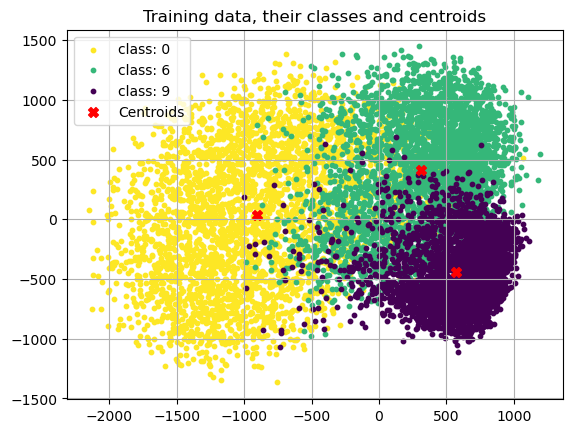

In [9]:
# Visualize the point in order to see to which class they belong and verify the correctness of 
# the distances w.r.t the centroids
plt.scatter(Z_k[0, y_train[0]==C1], Z_k[1, y_train[0]==C1], c='#FDE725', s=10, marker='o', label=f'class: {C1}')
plt.scatter(Z_k[0, y_train[0]==C2], Z_k[1, y_train[0]==C2], c='#35B779', s=10, marker='o', label=f'class: {C2}')
plt.scatter(Z_k[0, y_train[0]==C3], Z_k[1, y_train[0]==C3], c='#440154', s=10, marker='o', label=f'class: {C3}')
plt.scatter(centroids[0, :], centroids[1, :], c='red', marker='X', s=50, label='Centroids')
plt.title("Training data, their classes and centroids")
plt.grid()
plt.legend()
plt.show()

Compute, for each cluster, the average distance from the centroid. Comment the result;

In [10]:
# here i compute the distances with cdist function, that computes distances between 
# every point of the cluster Z_k and the respective centroids
dist_1 = cdist(Z_k[:, y_train[0]==C1].T, centroids[:,0:1].T, metric='euclidean')
dist_2 = cdist(Z_k[:, y_train[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
dist_3 = cdist(Z_k[:, y_train[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

In [11]:
avg_dist_1 = np.mean(dist_1, axis=0)[0]
avg_dist_2 = np.mean(dist_2, axis=0)[0]
avg_dist_3 = np.mean(dist_3, axis=0)[0]
print("Results for TRAIN data")
print(f"average distance from centroid of class {C1}: {round(avg_dist_1,2)}")
print(f"average distance from centroid of class {C2}: {round(avg_dist_2,2)}")
print(f"average distance from centroid of class {C3}: {round(avg_dist_3,2)}")

Results for TRAIN data
average distance from centroid of class 0: 722.13
average distance from centroid of class 6: 529.07
average distance from centroid of class 9: 351.81


Compute, for each cluster, the average distance from the centroid on the **test set**. Comment the results;  
`NB:` the centroids must be the same as the train!

In [12]:
CX_test = centroid(X_test)
Xc_test = X_test - CX_test

In [13]:
# Note: U_k is not recomputed, is the same of the train. 
Z_k_test = U_k.T @ Xc_test
print(f"Shape of Z_k: {Z_k_test.shape}.")

Shape of Z_k: (2, 2492).


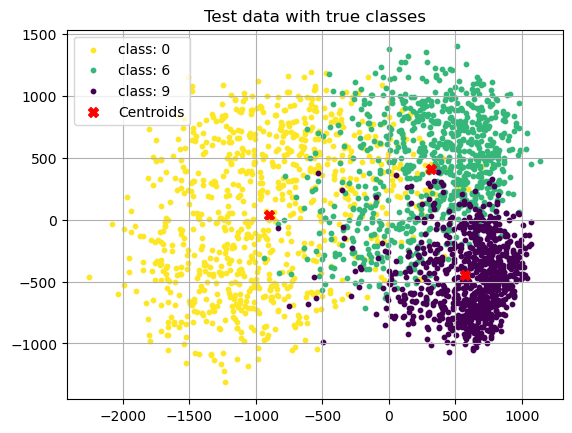

In [14]:
# Visualize the point in order to see to which class they belong and verify the correctness of 
# the distances w.r.t the centroids
plt.scatter(Z_k_test[0, y_test[0]==C1], Z_k_test[1, y_test[0]==C1], c='#FDE725', s=10, marker='o', label=f'class: {C1}')
plt.scatter(Z_k_test[0, y_test[0]==C2], Z_k_test[1, y_test[0]==C2], c='#35B779', s=10, marker='o', label=f'class: {C2}')
plt.scatter(Z_k_test[0, y_test[0]==C3], Z_k_test[1, y_test[0]==C3], c='#440154', s=10, marker='o', label=f'class: {C3}')
plt.scatter(centroids[0, :], centroids[1, :], c='red', marker='X', s=50, label='Centroids')
plt.title("Test data with true classes")
plt.grid()
plt.legend()
plt.show()


In [15]:
# here i compute the distances with cdist, that computes distances between 
# every point of the cluster Z_k and the respective centroids
dist_1_test = cdist(Z_k_test[:, y_test[0]==C1].T, centroids[:,0:1].T, metric='euclidean')
dist_2_test = cdist(Z_k_test[:, y_test[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
dist_3_test = cdist(Z_k_test[:, y_test[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

avg_dist_1_test = np.mean(dist_1_test, axis=0)[0]
avg_dist_2_test = np.mean(dist_2_test, axis=0)[0]
avg_dist_3_test = np.mean(dist_3_test, axis=0)[0]
print("Results for TEST data")
print(f"average distance from centroid of class {C1}: {round(avg_dist_1_test,2)}")
print(f"average distance from centroid of class {C2}: {round(avg_dist_2_test,2)}")
print(f"average distance from centroid of class {C3}: {round(avg_dist_3_test,2)}")

Results for TEST data
average distance from centroid of class 0: 733.09
average distance from centroid of class 6: 530.88
average distance from centroid of class 9: 360.88


### Define a classification algorithm in this way: 
given a new observation x, compute the distance between
x and each cluster centroid. Assign x to the class corresponding the the closer centroid. Compute the
accuracy of this algorithm on the test set and compute its accuracy;

In [18]:
# computing the distance between each datapoint and the three centroids
distances_matrix = cdist(Z_k_test.T, centroids.T, metric='euclidean')
print(f"Computing the pair-wise distance between each datapoint of the dataset and each centroid, obtaining a {distances_matrix.shape[0]}x{distances_matrix.shape[1]} matrix.")
print(f"\nI reduce this matrix as a single array by selecting the lower value for each row, representing the least distance. \nThe index will identify the class of belonging.")
# np.argmin returns the index of the column (axis=1) with the minimum distance
y_pred = np.argmin(distances_matrix, axis=1)
y_pred[y_pred==0], y_pred[y_pred==1], y_pred[y_pred==2] = C1, C2, C3 

Computing the pair-wise distance between each datapoint of the dataset and each centroid, obtaining a 2492x3 matrix.

I reduce this matrix as a single array by selecting the lower value for each row, representing the least distance. 
The index will identify the class of belonging.


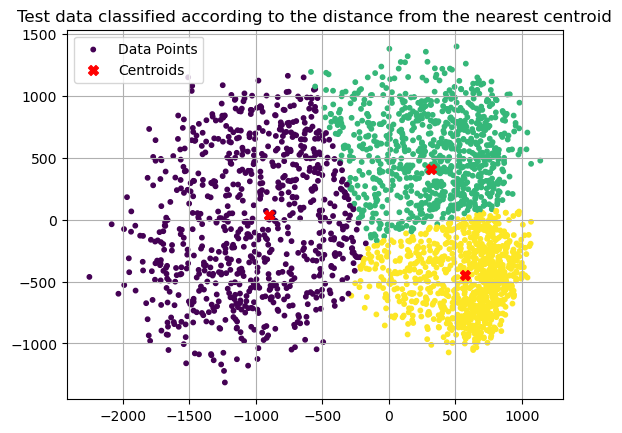

In [19]:
# Visualize the point (project)
plt.scatter(Z_k_test[0, :], Z_k_test[1, :], c=y_pred, cmap='viridis', s=10, marker='o', label='Data Points')
plt.scatter(centroids[0, :], centroids[1, :], c='red', marker='X', s=50, label='Centroids')
plt.title("Test data classified according to the distance from the nearest centroid")
plt.grid()
plt.legend()
plt.show()

# The points represent the digit!

In [20]:
correct_guess = np.sum(y_test==y_pred)
accuracy_score = correct_guess/y_test.shape[1]
print(f"The accuracy of this classification algorithm over the whole testset is {round(accuracy_score*100,2)}%. k = 2")

The accuracy of this classification algorithm over the whole testset is 85.27%. k = 2


# Repeat this experiment for different values of k and different digits. What do you observe?

In [21]:
from mpl_toolkits.mplot3d import Axes3D

In [22]:
X, y = data_array[1:,:], data_array[:1, :]
X.shape, y.shape

C1, C2, C3 = (0,6,9)
idx = (y[0] == C1) | (y[0] == C2) | (y[0] == C3)
X = X[:, idx]
y = y[:, idx]

N_train = int(0.8 * y.shape[1])
X_train, y_train, X_test, y_test = train_test_split(X, y, N_train)

In [23]:
CX = centroid(X_train)
Xc = X_train - CX

In [24]:
k = 3

U, s, VT = np.linalg.svd(Xc, full_matrices = False) # it is a huge dataset, not compute it in full
U_k = U[:, :k]

Z_k = U_k.T @ Xc
print(f"Shape of Z_k: {Z_k.shape}.")

Shape of Z_k: (3, 9965).


In [25]:
# i build a matrix centroid containing the coordinate of the three centroids
centroids = np.array([centroid(Z_k[:, y_train[0]==c], keepdims=False) for c in [C1,C2,C3]]).T
centroids.shape

(3, 3)

Compute, for each cluster, the average distance from the centroid. Comment the result;

In [26]:
# here i compute the distances with cdist, that computes distances between 
# every point of the cluster Z_k and the respective centroids
dist_1 = cdist(Z_k[:, y_train[0]==C1].T, centroids[:,:1].T, metric='euclidean')
dist_2 = cdist(Z_k[:, y_train[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
dist_3 = cdist(Z_k[:, y_train[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

In [27]:
avg_dist_1 = np.mean(dist_1, axis=0)[0]
avg_dist_2 = np.mean(dist_2, axis=0)[0]
avg_dist_3 = np.mean(dist_3, axis=0)[0]
print("Results for TRAIN data")
print(f"average distance from centroid of class {C1}: {round(avg_dist_1,2)}")
print(f"average distance from centroid of class {C2}: {round(avg_dist_2,2)}")
print(f"average distance from centroid of class {C3}: {round(avg_dist_3,2)}")

Results for TRAIN data
average distance from centroid of class 0: 851.48
average distance from centroid of class 6: 707.29
average distance from centroid of class 9: 487.22


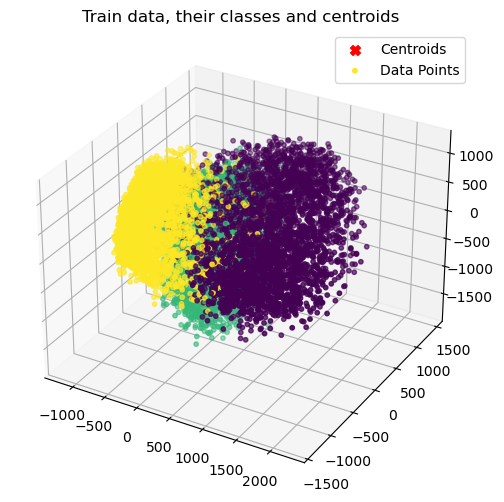

In [28]:
# Creating a 3D Subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

# Visualize the point (project)
ax.scatter(centroids[0, :], centroids[1, :], centroids[2, :], c='red', marker='X', s=50, label='Centroids')
ax.scatter(Z_k[0, :], Z_k[1, :], Z_k[2, :], c=y_train[0, :], cmap='viridis', s=10, marker='o', label='Data Points')
ax.set_title('Train data, their classes and centroids')
plt.grid()
plt.legend()
plt.show()

Compute, for each cluster, the average distance from the centroid on the **test set**. Comment the results;

In [29]:
CX_test = centroid(X_test)
Xc_test = X_test - CX_test

Z_k_test = U_k.T @ Xc_test
print(f"Shape of Z_k: {Z_k_test.shape}.")

Shape of Z_k: (3, 2492).


In [30]:
# here i compute the distances with cdist, that computes distances between 
# every point of the cluster Z_k and the respective centroids
dist_1_test = cdist(Z_k_test[:, y_test[0]==C1].T, centroids[:,0:1].T, metric='euclidean')
dist_2_test = cdist(Z_k_test[:, y_test[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
dist_3_test = cdist(Z_k_test[:, y_test[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

avg_dist_1_test = np.mean(dist_1_test, axis=0)[0]
avg_dist_2_test = np.mean(dist_2_test, axis=0)[0]
avg_dist_3_test = np.mean(dist_3_test, axis=0)[0]
print("Results for TEST data")
print(f"average distance from centroid of class {C1}: {round(avg_dist_1_test,2)}")
print(f"average distance from centroid of class {C2}: {round(avg_dist_2_test,2)}")
print(f"average distance from centroid of class {C3}: {round(avg_dist_3_test,2)}")

Results for TEST data
average distance from centroid of class 0: 855.8
average distance from centroid of class 6: 691.99
average distance from centroid of class 9: 470.08


### Define a classification algorithm in this way: 
given a new observation x, compute the distance between
x and each cluster centroid. Assign x to the class corresponding the the closer centroid. Compute the
accuracy of this algorithm on the test set and compute its accuracy;

In [31]:
# computing the distance between each datapoint and the three centroids
distances_matrix = cdist(Z_k_test.T, centroids.T, metric='euclidean')

# np.argmin returns the index of the column (axis=1) with the minimum distance
y_pred = np.argmin(distances_matrix, axis=1)
y_pred[y_pred==0], y_pred[y_pred==1], y_pred[y_pred==2] = C1, C2, C3  

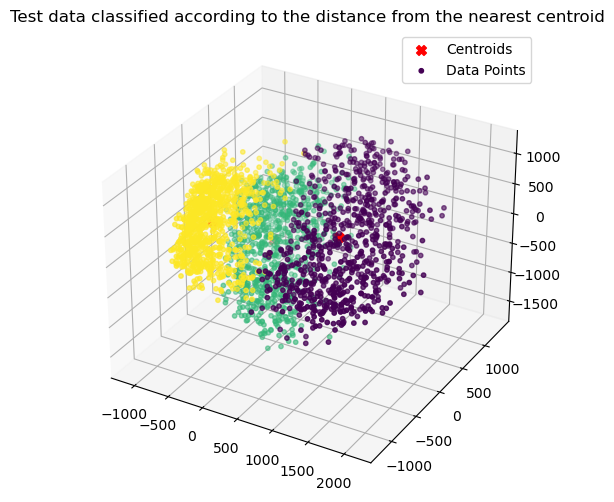

In [32]:
# Creating a 3D Subplot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

# Visualize the point (project)
ax.scatter(centroids[0, :], centroids[1, :], centroids[2, :], c='red', marker='X', s=50, label='Centroids')
ax.scatter(Z_k_test[0, :], Z_k_test[1, :], Z_k_test[2, :], c=y_pred, cmap='viridis', s=10, marker='o', label='Data Points')

ax.set_title('Test data classified according to the distance from the nearest centroid')
plt.grid()
plt.legend()
plt.show()

# The points represent the digit!

In [33]:
correct_guess = np.sum(y_test==y_pred)
accuracy_score = correct_guess/y_test.shape[1]
print(f"The accuracy of this classification algorithm over the whole testset is {round(accuracy_score*100,2)}%. k = 3")

The accuracy of this classification algorithm over the whole testset is 93.7%. k = 3


## Computing accuracies w.r.t k

In [34]:
#Loading the dataset, choosing the classes, extracting the train and test data
X, y = data_array[1:,:], data_array[:1, :]
X.shape, y.shape

C1, C2, C3 = (0,6,9)
idx = (y[0] == C1) | (y[0] == C2) | (y[0] == C3)
X = X[:, idx]
y = y[:, idx]

N_train = int(0.8 * y.shape[1])
X_train, y_train, X_test, y_test = train_test_split(X, y, N_train)

CX = centroid(X_train)
Xc = X_train - CX
#############################################################################

ks = np.arange(1,11,1)
accuracies = np.zeros(ks.shape)

for k in ks:
    
    U, s, VT = np.linalg.svd(Xc, full_matrices = False) # it is a huge dataset, not compute it in full    
    U_k = U[:, :k]
    Z_k = U_k.T @ Xc 
    
    # i build a matrix centroid containing the coordinate of the three centroids
    centroids = np.array([centroid(Z_k[:, y_train[0]==c], keepdims=False) for c in [C1,C2,C3]]).T
    centroids.shape
    
    CX_test = centroid(X_test)
    Xc_test = X_test - CX_test
    Z_k_test = U_k.T @ Xc_test
    
    # here i compute the distances with cdist, that computes distances between 
    # every point of the cluster Z_k and the respective centroids
    dist_1_test = cdist(Z_k_test[:, y_test[0]==C1].T, centroids[:,0:1].T, metric='euclidean')
    dist_2_test = cdist(Z_k_test[:, y_test[0]==C2].T, centroids[:,1:2].T, metric='euclidean')
    dist_3_test = cdist(Z_k_test[:, y_test[0]==C3].T, centroids[:,2:3].T, metric='euclidean')

    avg_dist_1_test = np.mean(dist_1_test, axis=0)[0]
    avg_dist_2_test = np.mean(dist_2_test, axis=0)[0]
    avg_dist_3_test = np.mean(dist_3_test, axis=0)[0]
    
    # computing the distance between each datapoint and the three centroids
    distances_matrix = cdist(Z_k_test.T, centroids.T, metric='euclidean')

    # np.argmin returns the index of the column (axis=1) with the minimum distance
    y_pred = np.argmin(distances_matrix, axis=1)
    y_pred[y_pred==0], y_pred[y_pred==1], y_pred[y_pred==2] = C1, C2, C3 
    
    correct_guess = np.sum(y_test==y_pred)
    accuracy_score = (correct_guess/y_test.shape[1])*100
    accuracies[k-1] = accuracy_score

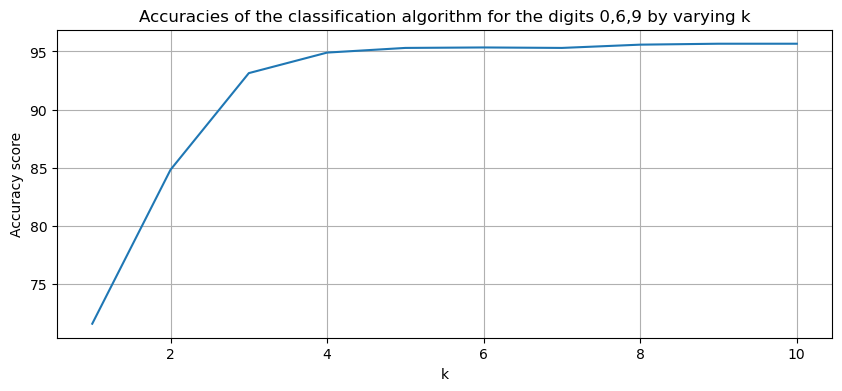

In [38]:
plt.figure(figsize=(10,4))
plt.plot(ks, accuracies)
plt.grid()
plt.title(f"Accuracies of the classification algorithm for the digits {C1},{C2},{C3} by varying k")
plt.xlabel("k")
plt.ylabel("Accuracy score")
plt.show()